In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [4]:
cluster = train['area_cluster'].unique()
cluster

array(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20',
       'C21', 'C22'], dtype=object)

In [5]:
train['torque'] = train['max_torque'].apply(lambda x: float(x.split('@')[0][:-2]))
train['torque_rpm'] = train['max_torque'].apply(lambda x: float(x.split('@')[1][:-3]))
train['hp'] =  train['max_power'].apply(lambda x: float(x.split('@')[0][:-3]))
train['hp_rpm'] =  train['max_power'].apply(lambda x: float(x.split('@')[1][:-3]))
train['age_of_car'] = train['age_of_car'] * 10
train['age_of_policyholder'] = train['age_of_policyholder'] * 100
train['area'] = (train['length'] * train['width'] * train['height'])/1000000
train.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,torque,torque_rpm,hp,hp_rpm,area
0,ID00001,0.515874,0.5,64.423077,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0,60.0,3500.0,40.36,6000.0,7698.283125
1,ID00002,0.672619,0.2,37.500000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0,60.0,3500.0,40.36,6000.0,7698.283125
2,ID00003,0.841110,0.2,38.461538,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0,60.0,3500.0,40.36,6000.0,7698.283125
3,ID00004,0.900277,1.1,43.269231,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0,113.0,4400.0,88.50,6000.0,10500.957375
4,ID00005,0.596403,1.1,63.461538,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0,91.0,4250.0,67.06,5500.0,8777.961010


In [6]:
train.drop(['policy_id','max_torque', 'max_power', 'area_cluster', 'model'], axis = 1, inplace=True)
train.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,segment,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,torque,torque_rpm,hp,hp_rpm,area
0,0.515874,0.5,64.423077,4990,1,A,CNG,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0,60.0,3500.0,40.36,6000.0,7698.283125
1,0.672619,0.2,37.500000,27003,1,A,CNG,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0,60.0,3500.0,40.36,6000.0,7698.283125
2,0.841110,0.2,38.461538,4076,1,A,CNG,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0,60.0,3500.0,40.36,6000.0,7698.283125
3,0.900277,1.1,43.269231,21622,1,C1,Petrol,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0,113.0,4400.0,88.50,6000.0,10500.957375
4,0.596403,1.1,63.461538,34738,2,A,Petrol,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0,91.0,4250.0,67.06,5500.0,8777.961010


In [7]:
train = pd.get_dummies(train,train.columns[train.dtypes == 'object'], drop_first=True)
print(train.shape)
train.head()

(58592, 59)


,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim,torque,torque_rpm,hp,hp_rpm,area,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility,fuel_type_Diesel,fuel_type_Petrol,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,is_esc_Yes,is_adjustable_steering_Yes,is_tpms_Yes,is_parking_sensors_Yes,is_parking_camera_Yes,rear_brakes_type_Drum,transmission_type_Manual,steering_type_Manual,steering_type_Power,is_front_fog_lights_Yes,is_rear_window_wiper_Yes,is_rear_window_washer_Yes,is_rear_window_defogger_Yes,is_brake_assist_Yes,is_power_door_locks_Yes,is_central_locking_Yes,is_power_steering_Yes,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_Yes,is_ecw_Yes,is_speed_alert_Yes
0,0.515874,0.5,64.423077,4990,1,2,796,3,5,4.6,3445,1515,1475,1185,0,0,60.0,3500.0,40.36,6000.0,7698.283125,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,0.672619,0.2,37.500000,27003,1,2,796,3,5,4.6,3445,1515,1475,1185,0,0,60.0,3500.0,40.36,6000.0,7698.283125,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.841110,0.2,38.461538,4076,1,2,796,3,5,4.6,3445,1515,1475,1185,0,0,60.0,3500.0,40.36,6000.0,7698.283125,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.900277,1.1,43.269231,21622,1,2,1197,4,5,4.8,3995,1735,1515,1335,2,0,113.0,4400.0,88.50,6000.0,10500.957375,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,0,0,1,0,0,1,1,1,1,1,1,1,1,1
4,0.596403,1.1,63.461538,34738,2,2,999,3,5,5.0,3731,1579,1490,1155,2,0,91.0,4250.0,67.06,5500.0,8777.961010,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1


In [8]:
x = train.drop('is_claim',  axis = 1)
y = train['is_claim']

In [9]:
x.shape, y.shape

((58592, 58), (58592,))

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 31)

In [11]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_sm, y_sm= smote.fit_resample(x_train, y_train)

0.8587520480611688
              precision    recall  f1-score   support

           0       0.94      0.91      0.92     13742
           1       0.08      0.12      0.10       906

    accuracy                           0.86     14648
   macro avg       0.51      0.51      0.51     14648
weighted avg       0.89      0.86      0.87     14648



c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


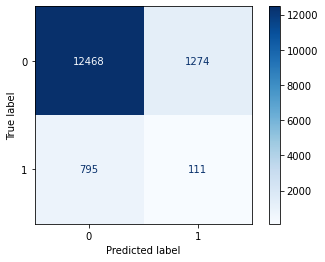

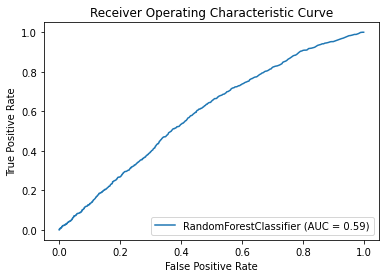

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix

rand_clf = RandomForestClassifier(n_estimators=1000,
                                 random_state = 35)
rand_clf.fit(x_sm, y_sm)
ranf_score = rand_clf.score(x_test, y_test)
print(ranf_score)

y_preds = rand_clf.predict(x_test)
print(classification_report(y_test, y_preds))
plot_confusion_matrix(rand_clf, x_test, y_test, cmap=plt.cm.Blues)
plot_roc_curve(rand_clf, x_test, y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');

0.900191152375751
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     13742
           1       0.12      0.10      0.11       906

    accuracy                           0.90     14648
   macro avg       0.53      0.53      0.53     14648
weighted avg       0.89      0.90      0.90     14648



c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


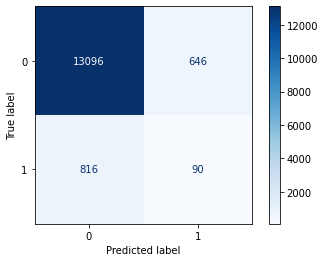

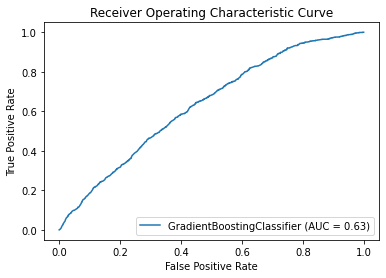

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_sm, y_sm)
gbc_score = gbc.score(x_test, y_test)
print(gbc_score)

y_preds = gbc.predict(x_test)
print(classification_report(y_test, y_preds))
plot_confusion_matrix(gbc, x_test, y_test, cmap=plt.cm.Blues)
plot_roc_curve(gbc, x_test, y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');

0.9302293828509012
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     13742
           1       0.13      0.02      0.04       906

    accuracy                           0.93     14648
   macro avg       0.54      0.51      0.50     14648
weighted avg       0.89      0.93      0.91     14648



c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


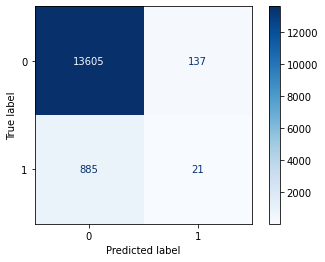

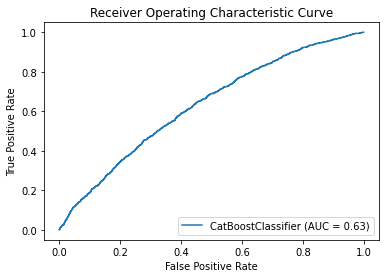

In [14]:
from catboost import CatBoostClassifier
cbc = CatBoostClassifier(random_seed = 31)
cbc.fit(x_sm, y_sm, verbose=False);
cbc_score = cbc.score(x_test, y_test)
print(cbc_score)

y_preds = cbc.predict(x_test)
print(classification_report(y_test, y_preds))
plot_confusion_matrix(cbc, x_test, y_test, cmap=plt.cm.Blues)
plot_roc_curve(cbc, x_test, y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');

0.9196477334789732
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     13742
           1       0.12      0.05      0.07       906

    accuracy                           0.92     14648
   macro avg       0.53      0.51      0.51     14648
weighted avg       0.89      0.92      0.90     14648



c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


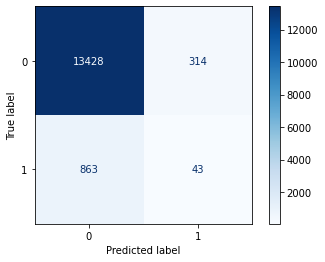

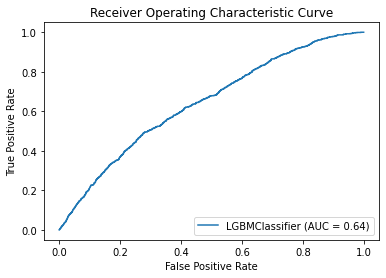

In [15]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(x_sm, y_sm)
lgbm_score = lgbm.score(x_test, y_test)
print(lgbm_score)

y_preds = lgbm.predict(x_test)
print(classification_report(y_test, y_preds))
plot_confusion_matrix(lgbm, x_test, y_test, cmap=plt.cm.Blues)
plot_roc_curve(lgbm, x_test, y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');

0.926815947569634
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     13742
           1       0.13      0.03      0.05       906

    accuracy                           0.93     14648
   macro avg       0.54      0.51      0.51     14648
weighted avg       0.89      0.93      0.91     14648



c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


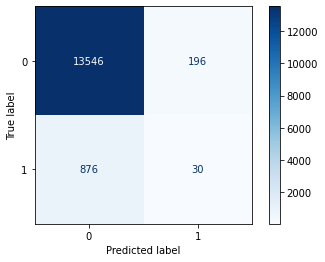

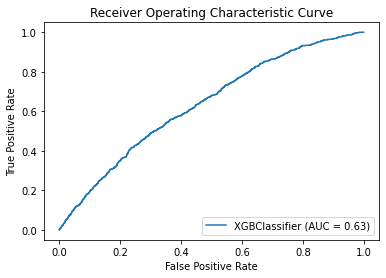

In [16]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_sm, y_sm)
print(xgb_classifier.score(x_test, y_test))

y_preds = xgb_classifier.predict(x_test)
print(classification_report(y_test, y_preds))
plot_confusion_matrix(xgb_classifier, x_test, y_test, cmap=plt.cm.Blues)
plot_roc_curve(xgb_classifier, x_test, y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');

In [17]:
test.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,ID58593,0.341732,0.00,0.586538,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
1,ID58594,0.307241,0.13,0.442308,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,No,Yes,No,Yes,No,Drum,1197,4,Manual,5,Electric,4.8,3845,1735,1530,1335,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
2,ID58595,0.327924,0.12,0.451923,C8,8794,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2
3,ID58596,0.782654,0.01,0.461538,C5,34738,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
4,ID58597,1.233404,0.02,0.634615,C5,34738,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0


In [18]:
test['torque'] = test['max_torque'].apply(lambda x: float(x.split('@')[0][:-2]))
test['torque_rpm'] = test['max_torque'].apply(lambda x: float(x.split('@')[1][:-3]))
test['hp'] =  test['max_power'].apply(lambda x: float(x.split('@')[0][:-3]))
test['hp_rpm'] =  test['max_power'].apply(lambda x: float(x.split('@')[1][:-3]))
test['age_of_car'] = test['age_of_car'] * 10
test['age_of_policyholder'] = test['age_of_policyholder'] * 100
test['area'] = (test['length'] * test['width'] * test['height'])/1000000
test.drop(['policy_id','max_torque', 'max_power', 'area_cluster', 'model'], axis = 1, inplace=True)
test.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,segment,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,torque,torque_rpm,hp,hp_rpm,area
0,0.341732,0.0,58.653846,4076,1,A,CNG,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,60.0,3500.0,40.36,6000.0,7698.283125
1,0.307241,1.3,44.230769,8794,1,B2,Petrol,K Series Dual jet,2,No,Yes,No,Yes,No,Drum,1197,4,Manual,5,Electric,4.8,3845,1735,1530,1335,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,113.0,4400.0,88.50,6000.0,10206.744750
2,0.327924,1.2,45.192308,8794,2,A,Petrol,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,91.0,4250.0,67.06,5500.0,8777.961010
3,0.782654,0.1,46.153846,34738,1,A,CNG,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,60.0,3500.0,40.36,6000.0,7698.283125
4,1.233404,0.2,63.461538,34738,1,A,CNG,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,60.0,3500.0,40.36,6000.0,7698.283125


In [19]:
test = pd.get_dummies(test,test.columns[test.dtypes == 'object'], drop_first=True)
print(test.shape)
test.head()

(39063, 58)


,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,torque,torque_rpm,hp,hp_rpm,area,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility,fuel_type_Diesel,fuel_type_Petrol,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,is_esc_Yes,is_adjustable_steering_Yes,is_tpms_Yes,is_parking_sensors_Yes,is_parking_camera_Yes,rear_brakes_type_Drum,transmission_type_Manual,steering_type_Manual,steering_type_Power,is_front_fog_lights_Yes,is_rear_window_wiper_Yes,is_rear_window_washer_Yes,is_rear_window_defogger_Yes,is_brake_assist_Yes,is_power_door_locks_Yes,is_central_locking_Yes,is_power_steering_Yes,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_Yes,is_ecw_Yes,is_speed_alert_Yes
0,0.341732,0.0,58.653846,4076,1,2,796,3,5,4.6,3445,1515,1475,1185,0,60.0,3500.0,40.36,6000.0,7698.283125,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,0.307241,1.3,44.230769,8794,1,2,1197,4,5,4.8,3845,1735,1530,1335,2,113.0,4400.0,88.50,6000.0,10206.744750,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,0,0,1,1,1,1,1,1,1,1
2,0.327924,1.2,45.192308,8794,2,2,999,3,5,5.0,3731,1579,1490,1155,2,91.0,4250.0,67.06,5500.0,8777.961010,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1
3,0.782654,0.1,46.153846,34738,1,2,796,3,5,4.6,3445,1515,1475,1185,0,60.0,3500.0,40.36,6000.0,7698.283125,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4,1.233404,0.2,63.461538,34738,1,2,796,3,5,4.6,3445,1515,1475,1185,0,60.0,3500.0,40.36,6000.0,7698.283125,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [20]:
preds = rand_clf.predict(test)
preds

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
sub = pd.read_csv('sample_submission_KvRh9Sx.csv')
sub['is_claim'] = preds
sub.to_csv('submission_10.csv', index=False)
sub.head()

,policy_id,is_claim
0,ID58593,1
1,ID58594,0
2,ID58595,0
3,ID58596,0
4,ID58597,0
